<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Activity7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 7.1 DATA PREPARATION

* 7.1(a)Get Data

In [207]:
df = pd.read_csv('/content/Coffee-modified.csv')

In [208]:
df.columns

Index(['ID', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [209]:
selected_df = df[['Total.Cup.Points', 'Species','Country.of.Origin','Processing.Method', 'Aroma', 'Flavor', 'Aftertaste','Acidity','Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']]

In [210]:
selected_df

Total.Cup.Points  Species Country.of.Origin Processing.Method Aroma  \
0               90.58  Arabica          Ethiopia      Washed / Wet  8.67   
1               89.92  Arabica          Ethiopia      Washed / Wet  8.75   
2               89.75  Arabica         Guatemala               NaN  8.42   
3                  89  Arabica          Ethiopia     Natural / Dry  8.17   
4               88.83  Arabica          Ethiopia      Washed / Wet  8.25   
...               ...      ...               ...               ...   ...   
1314            68.33  Arabica            Mexico      Washed / Wet  7.08   
1315            67.92  Arabica             Haiti     Natural / Dry  6.75   
1316            63.08  Arabica         Nicaragua             Other  7.25   
1317            59.83  Arabica         Guatemala      Washed / Wet   7.5   
1318                0  Arabica          Honduras               NaN     0   

     Flavor Aftertaste Acidity  Body  Balance  Uniformity Moisture  \
0      8.83       8.67    8.75  8.50     8.42       10.00     0.12   
1      8.67        8.5    8.58  8.42     8.42       10.00     0.12   
2       8.5       8.42    8.42  8.33     8.42       10.00        0   
3      8.58       8.42    8.42  8.50     8.25       10.00     0.11   
4       8.5       8.25     8.5  8.42     8.33       10.00     0.12   
...     ...        ...     ...   ...      ...         ...      ...   
1314   6.83       6.25    7.42  7.25     6.75       10.00     0.11   
1315   6.58       6.42    6.67  7.08     6.67        9.33     0.14   
1316   6.58       6.33    6.25  6.42     6.08        6.00     0.13   
1317   6.67       6.67    7.67  7.33     6.67        8.00      0.1   
1318      0          0       0  0.00     0.00        0.00     0.12   

      altitude_mean_meters  
0                  2075.00  
1                  2075.00  
2                  1700.00  
3                  2000.00  
4                  2075.00  
...                    ...  
1314                900.00  
1315                350.00  
1316               1100.00  
1317               1417.32  
1318               1400.00  

[1319 rows x 13 columns]

In [211]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1308 non-null   object 
 1   Species               1319 non-null   object 
 2   Country.of.Origin     1316 non-null   object 
 3   Processing.Method     1159 non-null   object 
 4   Aroma                 1311 non-null   object 
 5   Flavor                1309 non-null   object 
 6   Aftertaste            1309 non-null   object 
 7   Acidity               1309 non-null   object 
 8   Body                  1309 non-null   float64
 9   Balance               1309 non-null   float64
 10  Uniformity            1309 non-null   float64
 11  Moisture              1308 non-null   object 
 12  altitude_mean_meters  1081 non-null   float64
dtypes: float64(4), object(9)
memory usage: 134.1+ KB


In [212]:
# Drop NA
selected_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [213]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1317
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1002 non-null   object 
 1   Species               1002 non-null   object 
 2   Country.of.Origin     1002 non-null   object 
 3   Processing.Method     1002 non-null   object 
 4   Aroma                 1002 non-null   object 
 5   Flavor                1002 non-null   object 
 6   Aftertaste            1002 non-null   object 
 7   Acidity               1002 non-null   object 
 8   Body                  1002 non-null   float64
 9   Balance               1002 non-null   float64
 10  Uniformity            1002 non-null   float64
 11  Moisture              1002 non-null   object 
 12  altitude_mean_meters  1002 non-null   float64
dtypes: float64(4), object(9)
memory usage: 109.6+ KB


In [214]:
# View Statistics
selected_df.describe()

Body      Balance   Uniformity  altitude_mean_meters
count  1002.000000  1002.000000  1002.000000           1002.000000
mean      7.504371     7.499301     9.870090           1817.706979
std       0.272948     0.340971     0.445574           9116.977383
min       6.330000     6.080000     6.000000              1.000000
25%       7.330000     7.330000    10.000000           1100.000000
50%       7.500000     7.500000    10.000000           1310.640000
75%       7.670000     7.670000    10.000000           1600.000000
max       8.500000     8.580000    10.000000         190164.000000

In [215]:
selected_df = selected_df.reset_index()

In [216]:
# Assign X, Y (drop datetime index)
Y = selected_df.iloc[:, 1]
X = selected_df.iloc[:, 2:-1]

In [217]:
Y

0       90.58
1       89.92
2          89
3       88.83
4       88.25
        ...  
997     69.17
998     68.33
999     67.92
1000    63.08
1001    59.83
Name: Total.Cup.Points, Length: 1002, dtype: object

In [218]:
X

Species Country.of.Origin Processing.Method Aroma Flavor Aftertaste  \
0     Arabica          Ethiopia      Washed / Wet  8.67   8.83       8.67   
1     Arabica          Ethiopia      Washed / Wet  8.75   8.67        8.5   
2     Arabica          Ethiopia     Natural / Dry  8.17   8.58       8.42   
3     Arabica          Ethiopia      Washed / Wet  8.25    8.5       8.25   
4     Arabica          Ethiopia     Natural / Dry  8.08   8.58        8.5   
...       ...               ...               ...   ...    ...        ...   
997   Arabica          Honduras      Washed / Wet     7   6.33       6.17   
998   Arabica            Mexico      Washed / Wet  7.08   6.83       6.25   
999   Arabica             Haiti     Natural / Dry  6.75   6.58       6.42   
1000  Arabica         Nicaragua             Other  7.25   6.58       6.33   
1001  Arabica         Guatemala      Washed / Wet   7.5   6.67       6.67   

     Acidity  Body  Balance  Uniformity Moisture  
0       8.75  8.50     8.42       10.00     0.12  
1       8.58  8.42     8.42       10.00     0.12  
2       8.42  8.50     8.25       10.00     0.11  
3        8.5  8.42     8.33       10.00     0.12  
4        8.5  7.67     8.42       10.00      0.1  
...      ...   ...      ...         ...      ...  
997      6.5  6.67     6.17        8.00      0.1  
998     7.42  7.25     6.75       10.00     0.11  
999     6.67  7.08     6.67        9.33     0.14  
1000    6.25  6.42     6.08        6.00     0.13  
1001    7.67  7.33     6.67        8.00      0.1  

[1002 rows x 11 columns]

* 7.1 (b) Data Preparation (prepare Y)

In [219]:
# Process Y from values to Coffee Bean Grade
# define Bean_Grade = [1,2,3] using
Y = Y.astype(float)
rating_pctile = np.percentile(Y, [75, 90])

In [220]:
rating_pctile

array([83.58, 84.58])

In [221]:
Bean_grade1 = []
Bean_grade2 = []
Bean_grade3 = []
Bean_grade = []

for sample in Y:
  if sample < rating_pctile[0]: # 75%
    Bean_grade1.append(sample)
    Bean_grade.append(1)
  elif rating_pctile[0] <= sample <= rating_pctile[1]: # between 75-90%
    Bean_grade2.append(sample)
    Bean_grade.append(2)
  elif sample > rating_pctile[1]:
    Bean_grade3.append(sample)
    Bean_grade.append(3)

In [222]:
print(Bean_grade1)
print('len g1: ',len(Bean_grade1))
print('--------------------------------------------------')
print(Bean_grade2)
print('len g2: ',len(Bean_grade2))
print('--------------------------------------------------')
print(Bean_grade3)
print('len g3: ',len(Bean_grade3))

[83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.42, 83.42, 83.42, 83.42, 83.42, 83.42, 83.42, 83.42, 83.42, 83.42, 83.42, 83.42, 83.42, 83.42, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.25, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.17, 83.08, 83.08, 83.08, 83.08, 83.08, 83.08, 83.08, 83.08, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.92, 82.9

In [223]:
new_Bean_grade = pd.DataFrame(Bean_grade, index=None,columns=['Bean grade'])

In [224]:
n_sample = []
for sample in Bean_grade:
  if sample == 1: 
    n_sample.append(len(Bean_grade1))
    
  elif sample == 2: 
    n_sample.append(len(Bean_grade2))
  elif sample == 3: 
    n_sample.append(len(Bean_grade3))

In [225]:
# new_sample = pd.DataFrame(n_sample, index=None,columns=['Nsamples'])
# new_Bean_grade = pd.concat([new_Bean_grade, new_sample], axis=1)

In [226]:
new_y = pd.concat([Y,new_Bean_grade], axis=1)

In [227]:
new_y

Total.Cup.Points  Bean grade
0                90.58           3
1                89.92           3
2                89.00           3
3                88.83           3
4                88.25           3
...                ...         ...
997              69.17           1
998              68.33           1
999              67.92           1
1000             63.08           1
1001             59.83           1

[1002 rows x 2 columns]

In [228]:
# Visualize Bar Graph of Number of Samples for each Bean Grade
Nsamples = [len(Bean_grade1), len(Bean_grade2), len(Bean_grade3)]
BeanGrade = [1,2,3]
dict_viz = zip(Nsamples,BeanGrade)

viz = pd.DataFrame(dict_viz, columns=['Nsamples','Bean grade'])

In [229]:
viz

Nsamples  Bean grade
0       745           1
1       164           2
2        93           3

In [230]:
fig = px.bar(viz, x = 'Bean grade', y = 'Nsamples', color='Nsamples', range_y=[0.0,1000])
fig.show()

* 7.1 (c) Data preparation (Prepare X)

In [231]:
# Standardized data ( X [ numerical feature columns ])
X_num = X[['Aroma',	'Flavor',	'Aftertaste',	'Acidity',	'Body',	'Balance',	'Uniformity',	'Moisture']] 
cat = ['Species',	'Country.of.Origin',	'Processing.Method']

In [232]:
X_num

Aroma Flavor Aftertaste Acidity  Body  Balance  Uniformity Moisture
0     8.67   8.83       8.67    8.75  8.50     8.42       10.00     0.12
1     8.75   8.67        8.5    8.58  8.42     8.42       10.00     0.12
2     8.17   8.58       8.42    8.42  8.50     8.25       10.00     0.11
3     8.25    8.5       8.25     8.5  8.42     8.33       10.00     0.12
4     8.08   8.58        8.5     8.5  7.67     8.42       10.00      0.1
...    ...    ...        ...     ...   ...      ...         ...      ...
997      7   6.33       6.17     6.5  6.67     6.17        8.00      0.1
998   7.08   6.83       6.25    7.42  7.25     6.75       10.00     0.11
999   6.75   6.58       6.42    6.67  7.08     6.67        9.33     0.14
1000  7.25   6.58       6.33    6.25  6.42     6.08        6.00     0.13
1001   7.5   6.67       6.67    7.67  7.33     6.67        8.00      0.1

[1002 rows x 8 columns]

In [233]:
Xnum_scaler = preprocessing.StandardScaler()
Xnum_tranfrom = Xnum_scaler.fit_transform(X_num)

In [234]:
# feature selection (correlation)
# Calculate correlation between variables for only continuous data columns
Xnum_tranfrom = pd.DataFrame(Xnum_tranfrom, columns=[X_num.columns])
cor_data = Xnum_tranfrom.corr()

In [235]:
cor_data

Aroma    Flavor Aftertaste   Acidity      Body   Balance  \
Aroma       1.000000  0.730592   0.678569  0.603279  0.551523  0.611724   
Flavor      0.730592  1.000000   0.849033  0.752468  0.685117  0.734505   
Aftertaste  0.678569  0.849033   1.000000  0.691179  0.685897  0.765035   
Acidity     0.603279  0.752468   0.691179  1.000000  0.617694  0.644167   
Body        0.551523  0.685117   0.685897  0.617694  1.000000  0.702091   
Balance     0.611724  0.734505   0.765035  0.644167  0.702091  1.000000   
Uniformity  0.135434  0.222784   0.241887  0.191919  0.132777  0.243093   
Moisture   -0.077481 -0.120328  -0.166506 -0.099348 -0.201021 -0.217265   

           Uniformity  Moisture  
Aroma        0.135434 -0.077481  
Flavor       0.222784 -0.120328  
Aftertaste   0.241887 -0.166506  
Acidity      0.191919 -0.099348  
Body         0.132777 -0.201021  
Balance      0.243093 -0.217265  
Uniformity   1.000000 -0.005627  
Moisture    -0.005627  1.000000

In [236]:
# Reduce Corr() to Lower Matrix
lower = pd.DataFrame(np.tril(cor_data, -1), columns=cor_data.columns)

In [237]:
lower

Aroma    Flavor Aftertaste   Acidity      Body   Balance Uniformity  \
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   0.000000   
1  0.730592  0.000000   0.000000  0.000000  0.000000  0.000000   0.000000   
2  0.678569  0.849033   0.000000  0.000000  0.000000  0.000000   0.000000   
3  0.603279  0.752468   0.691179  0.000000  0.000000  0.000000   0.000000   
4  0.551523  0.685117   0.685897  0.617694  0.000000  0.000000   0.000000   
5  0.611724  0.734505   0.765035  0.644167  0.702091  0.000000   0.000000   
6  0.135434  0.222784   0.241887  0.191919  0.132777  0.243093   0.000000   
7 -0.077481 -0.120328  -0.166506 -0.099348 -0.201021 -0.217265  -0.005627   

  Moisture  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
5      0.0  
6      0.0  
7      0.0

In [238]:
# Drop columns if |correlation value| > 0.8
to_drop = []
for column in lower.columns:
  for i in lower[column]:
    if abs(i) > 0.8 :
     to_drop.append(column)

In [239]:
to_drop

[('Flavor',)]

In [240]:
Xnum_tranfrom.drop(to_drop, inplace=True, axis=1)

In [241]:
Xnum_tranfrom

Aroma Aftertaste   Acidity      Body   Balance Uniformity  Moisture
0     3.658398   3.862287  3.975715  3.649514  2.701574   0.291702  0.575854
1     3.923893   3.351184  3.423344  3.356271  2.701574   0.291702  0.575854
2     1.999058   3.110665  2.903466  3.649514  2.202749   0.291702  0.345788
3     2.264552   2.599562  3.163405  3.356271  2.437490   0.291702  0.575854
4     1.700377   3.351184  3.163405  0.607118  2.701574   0.291702  0.115722
...        ...        ...       ...       ...       ...        ...       ...
997  -1.883798  -3.653933 -3.335077 -3.058419 -3.900523  -4.199127  0.115722
998  -1.618304  -3.413414 -0.345775 -0.932407 -2.198649   0.291702  0.345788
999  -2.713468  -2.902311 -2.782706 -1.555549 -2.433390  -1.212726  1.035987
1000 -1.054128  -3.172895 -4.147387 -3.974803 -4.164606  -8.689957  0.805921
1001 -0.224458  -2.150689  0.466535 -0.639164 -2.433390  -4.199127  0.115722

[1002 rows x 7 columns]

In [242]:
# One hot encoding for Categorical feature columns

X_oneHot = pd.get_dummies(X[cat] , drop_first=True )

In [243]:
X_oneHot

Country.of.Origin_Burundi  Country.of.Origin_China  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
997                           0                        0   
998                           0                        0   
999                           0                        0   
1000                          0                        0   
1001                          0                        0   

      Country.of.Origin_Colombia  Country.of.Origin_Costa Rica  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   
...                          ...                           ...   
997                            0                             0   
998                            0                             0   
999                            0                             0   
1000                           0                             0   
1001                           0                             0   

      Country.of.Origin_Cote d?Ivoire  Country.of.Origin_Ecuador  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
997                                 0                          0   
998                                 0                          0   
999                                 0                          0   
1000                                0                          0   
1001                                0                          0   

      Country.of.Origin_El Salvador  Country.of.Origin_Ethiopia  \
0                                 0                           1   
1                                 0                           1   
2                                 0                           1   
3                                 0                           1   
4                                 0                           1   
...                             ...                         ...   
997                               0                           0   
998                               0                           0   
999                               0                           0   
1000                              0                           0   
1001                              0                           0   

      Country.of.Origin_Guatemala  Country.of.Origin_Haiti  ...  \
0                               0                        0  ...   
1                               0                        0  ...   
2                               0                        0  ...   
3                               0                        0  ...   
4                               0                        0  ...   
...                           ...                      ...  ...   
997                             0                        0  ...   
998                             0                        0  ...   
999                             0                        1  ...   
1000                            0                        0  ...   
1001                            1                        0  ...   

      Country.of.Origin_Thailand  Country.of.Origin_Uganda  \
0  

In [244]:
new_X = Xnum_tranfrom.join(X_oneHot)

In [245]:
new_X

(Aroma,)  (Aftertaste,)  (Acidity,)   (Body,)  (Balance,)  \
0     3.658398       3.862287    3.975715  3.649514    2.701574   
1     3.923893       3.351184    3.423344  3.356271    2.701574   
2     1.999058       3.110665    2.903466  3.649514    2.202749   
3     2.264552       2.599562    3.163405  3.356271    2.437490   
4     1.700377       3.351184    3.163405  0.607118    2.701574   
...        ...            ...         ...       ...         ...   
997  -1.883798      -3.653933   -3.335077 -3.058419   -3.900523   
998  -1.618304      -3.413414   -0.345775 -0.932407   -2.198649   
999  -2.713468      -2.902311   -2.782706 -1.555549   -2.433390   
1000 -1.054128      -3.172895   -4.147387 -3.974803   -4.164606   
1001 -0.224458      -2.150689    0.466535 -0.639164   -2.433390   

      (Uniformity,)  (Moisture,)  Country.of.Origin_Burundi  \
0          0.291702     0.575854                          0   
1          0.291702     0.575854                          0   
2          0.291702     0.345788                          0   
3          0.291702     0.575854                          0   
4          0.291702     0.115722                          0   
...             ...          ...                        ...   
997       -4.199127     0.115722                          0   
998        0.291702     0.345788                          0   
999       -1.212726     1.035987                          0   
1000      -8.689957     0.805921                          0   
1001      -4.199127     0.115722                          0   

      Country.of.Origin_China  Country.of.Origin_Colombia  ...  \
0                           0                           0  ...   
1                           0                           0  ...   
2                           0                           0  ...   
3                           0                           0  ...   
4                           0                           0  ...   
...                       ...                         ...  ...   
997                         0                           0  ...   
998                         0                           0  ...   
999                         0                           0  ...   
1000                        0                           0  ...   
1001                        0                           0  ...   

      Country.of.Origin_Thailand  Country.of.Origin_Uganda  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   
...                          ...                       ...   
997                            0                         0   
998                            0                         0   
999                            0                         0   
1000                           0                         0   
1001                           0                         0   

      Country.of.Origin_United States  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   
...                               ...   
997                                 0   
998                                 0   
999                                 0   
1000                                0   
1001                                0   

      Country.of.Origin_United States (Puerto Rico)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
997                         

In [246]:
Y = new_y['Bean grade']

In [264]:
Y.describe()

count    1002.000000
mean        1.349301
std         0.642908
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Bean grade, dtype: float64

In [247]:
# Prepare X train, Xtest , Y train, Ytest

test_size = int(0.3 * len(new_X))
train_size = int(0.7 * len(new_X))
X_train, X_test = new_X[0:train_size], new_X[train_size:len(new_X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(new_X)]

In [248]:
# lab_enc = preprocessing.LabelEncoder()
# Y_train = lab_enc.fit_transform(Y_train)

In [249]:
# Y_test = lab_enc.fit_transform(Y_test)

# 7.2 (a) KNN Model Training and Testing

In [265]:
# KNN parameter
# k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 25, 35] # try at least 3 values
k = [1, 13, 35]

In [266]:
# Model Training
KNN_model =[]
for i in k :
  modelKNN = KNeighborsClassifier(n_neighbors=i, p=2)
  modelKNN.fit(X_train, Y_train)
  KNN_model.append(modelKNN)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



In [267]:
# Model Testing
Y_pred_KNN =[]
KNN_Score = []
for i in range(len(KNN_model)):
  Y_pred= KNN_model[i].predict(X_test)
  KNNScore = accuracy_score(Y_test, Y_pred)
  KNN_Score.append(KNNScore)
  Y_pred_KNN.append(Y_pred)
  print(KNNScore)

0.9867109634551495
0.9933554817275747
0.9966777408637874


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



In [268]:
k = [1,2,3]
KNN_Score = zip(KNN_Score, k)
KNNScore = pd.DataFrame(KNN_Score,columns=['KNN_Score','k'])

In [269]:
KNNScore

KNN_Score  k
0   0.986711  1
1   0.993355  2
2   0.996678  3

In [270]:
# Visualize compare accuracy of selected k values (at least 3 values of k)
fig = px.bar( KNNScore, x = 'k', y = 'KNN_Score', color='KNN_Score', range_y=[0.80,1.0])
fig.show()

In [279]:
# Print Confusion Matrix and Classification Report for best k
for i in range(len(Y_pred_KNN)):
  print('Confusion Matrix: ')
  print(confusion_matrix(Y_test, Y_pred_KNN[i]))
  print('Classification Report: ')
  print(classification_report(Y_test, Y_pred_KNN[i]))
  print('///////////////////////////////////////////////////////////////')

Confusion Matrix: 
[[297   4]
 [  0   0]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       301
           2       0.00      0.00      0.00         0

    accuracy                           0.99       301
   macro avg       0.50      0.49      0.50       301
weighted avg       1.00      0.99      0.99       301

///////////////////////////////////////////////////////////////
Confusion Matrix: 
[[299   2]
 [  0   0]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       301
           2       0.00      0.00      0.00         0

    accuracy                           0.99       301
   macro avg       0.50      0.50      0.50       301
weighted avg       1.00      0.99      1.00       301

///////////////////////////////////////////////////////////////
Confusion Matrix: 
[[300   1]
 [  0   0]]
Classification Report: 
              precis

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



# 7.2 (b) Decision Tree Model Training and Testing

In [314]:
# Decision Tree parameter
# ASM_function = ['entropy', 'gini'] / maxD = [4, 5, 6, None] # try at least 2 values
ASM_function = ['entropy', 'gini']
maxD = [4, 6]

In [315]:
# Model Training
ModelDT = DecisionTreeClassifier(criterion=ASM_function[0], splitter='best',max_depth =maxD[0] )
ModelDT.fit(X_train,Y_train)

ModelDT2 = DecisionTreeClassifier(criterion=ASM_function[1], splitter='best',max_depth =maxD[1] )
ModelDT2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



DecisionTreeClassifier(max_depth=6)

In [324]:
# Model Testing
Y_pred_DT = ModelDT.predict(X_test)
DTScore = accuracy_score(Y_test, Y_pred_DT)
print('DtScore  : ',DTScore)

Y_pred_DT2 = ModelDT2.predict(X_test)
DTScore2 = accuracy_score(Y_test, Y_pred_DT2)
print('DtScore2 : ',DTScore2)

DtScore  :  0.9667774086378738
DtScore2 :  0.9800664451827242


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



In [308]:
Y_test.describe()

count    301.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Bean grade, dtype: float64

In [319]:
# Print Confusion Matrix and Classification Report for best k
print(f'ASM_function = {ASM_function[0]} , MaxD = {maxD[0]}')
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, Y_pred_DT))
print('Classification Report: ')
print(classification_report(Y_test, Y_pred_DT))

print('///////////////////////////////////////////////////////')
print(f'ASM_function = {ASM_function[1]} , MaxD = {maxD[1]}')
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, Y_pred_DT2))
print('Classification Report: ')
print(classification_report(Y_test, Y_pred_DT2))

ASM_function = entropy , MaxD = 4
Confusion Matrix: 
[[291  10]
 [  0   0]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       301
           2       0.00      0.00      0.00         0

    accuracy                           0.97       301
   macro avg       0.50      0.48      0.49       301
weighted avg       1.00      0.97      0.98       301

///////////////////////////////////////////////////////
ASM_function = gini , MaxD = 6
Confusion Matrix: 
[[295   6]
 [  0   0]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       301
           2       0.00      0.00      0.00         0

    accuracy                           0.98       301
   macro avg       0.50      0.49      0.49       301
weighted avg       1.00      0.98      0.99       301



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [290]:
print(type(Y_train))

<class 'pandas.core.series.Series'>


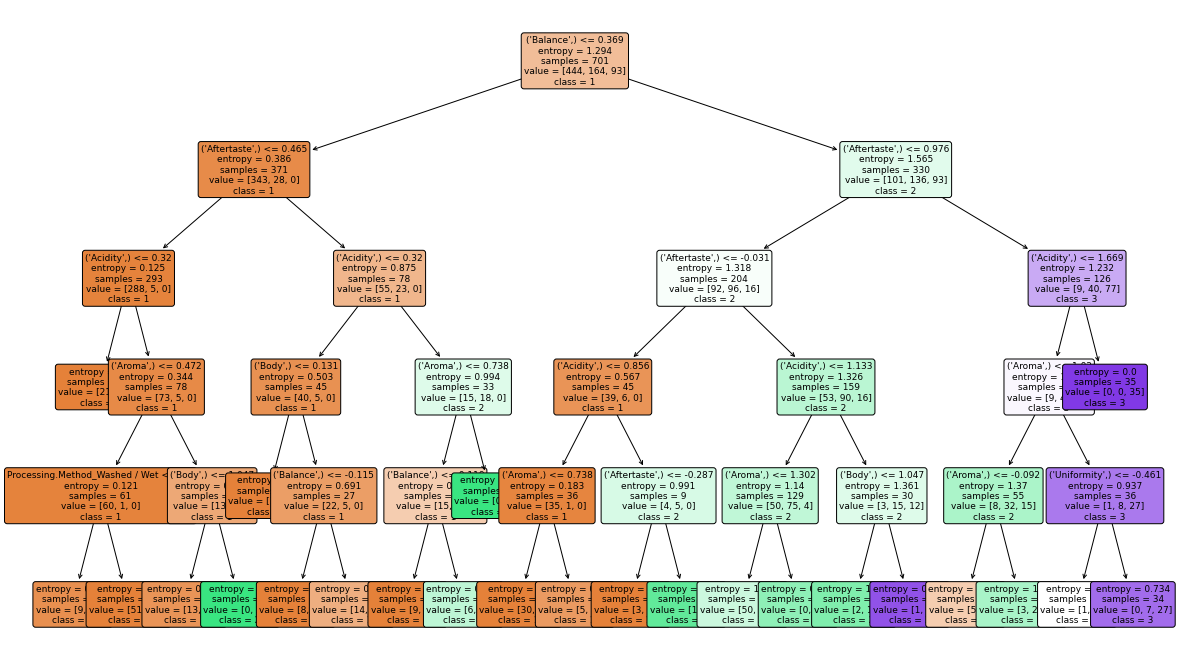

In [310]:
import sklearn
# Visualize Decision Tree
feature_names = X_train.columns
Labels = np.unique(Y_train)
Labels = Labels.astype('str')

fig = plt.figure(figsize=(20,12))
fig = sklearn.tree.plot_tree( ModelDT,

                feature_names = feature_names,
                class_names = Labels,
                rounded = True,
                filled = True, fontsize=9)
plt.show()

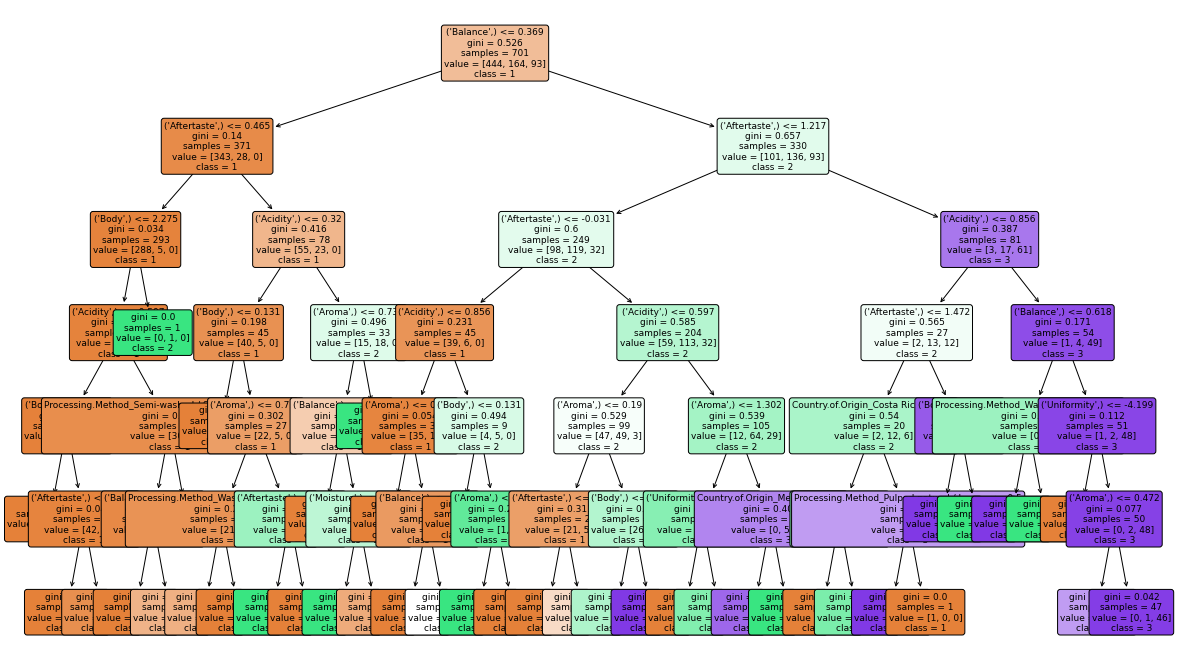

In [320]:
fig = plt.figure(figsize=(20,12))
fig = sklearn.tree.plot_tree( ModelDT2,

                feature_names = feature_names,
                class_names = Labels,
                rounded = True,
                filled = True, fontsize=9)
plt.show()

# 7.2 (c) Random Forest Model Training and Testing

In [321]:
# Random Forest parameter
ASM_function = ['entropy', 'gini'] 
nEstimator = 100
nJob = 2
rState = 10

In [328]:
# Model Training
model_RandomF = []
for i in range(len(ASM_function)):
  RandomF = RandomForestClassifier(criterion=ASM_function[i],n_estimators=nEstimator, n_jobs=nJob, random_state=rState)
  RandomF.fit(X_train,Y_train)
  model_RandomF.append(RandomF)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



In [329]:
# Model Testing
Y_pred_RF = model_RandomF[0].predict(X_test)
RFScore = accuracy_score(Y_test, Y_pred_RF)
print('RFScore  : ',RFScore)

Y_pred_RF2 = model_RandomF[1].predict(X_test)
RFScore2 = accuracy_score(Y_test, Y_pred_RF2)
print('RFScore2 : ',RFScore2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



RFScore  :  0.9900332225913622
RFScore2 :  0.9900332225913622


In [330]:
# Print Confusion Matrix and Classification Report for best k
print('ASM_function : ',ASM_function[0])
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, Y_pred_RF))
print('Classification Report: ')
print(classification_report(Y_test, Y_pred_RF))

print('////////////////////////////////////////////////////////')
print('ASM_function : ',ASM_function[1])
print('Confusion Matrix: ')
print(confusion_matrix(Y_test, Y_pred_RF2))
print('Classification Report: ')
print(classification_report(Y_test, Y_pred_RF2))

ASM_function :  entropy
Confusion Matrix: 
[[298   3]
 [  0   0]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       301
           2       0.00      0.00      0.00         0

    accuracy                           0.99       301
   macro avg       0.50      0.50      0.50       301
weighted avg       1.00      0.99      0.99       301

////////////////////////////////////////////////////////
ASM_function :  gini
Confusion Matrix: 
[[298   3]
 [  0   0]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       301
           2       0.00      0.00      0.00         0

    accuracy                           0.99       301
   macro avg       0.50      0.50      0.50       301
weighted avg       1.00      0.99      0.99       301



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [337]:
# Visualize Feature Important Score
feature_imp = pd.Series(model_RandomF[0].feature_importances_, index = feature_names).sort_values(ascending=False)

In [351]:
feature_imp = pd.DataFrame(feature_imp)

In [367]:
temp = []
for i in range(len(feature_imp)):
  temp.append(feature_imp[0][i])

temp_index = []
for i in feature_imp.index:
  temp_index.append(str(i))

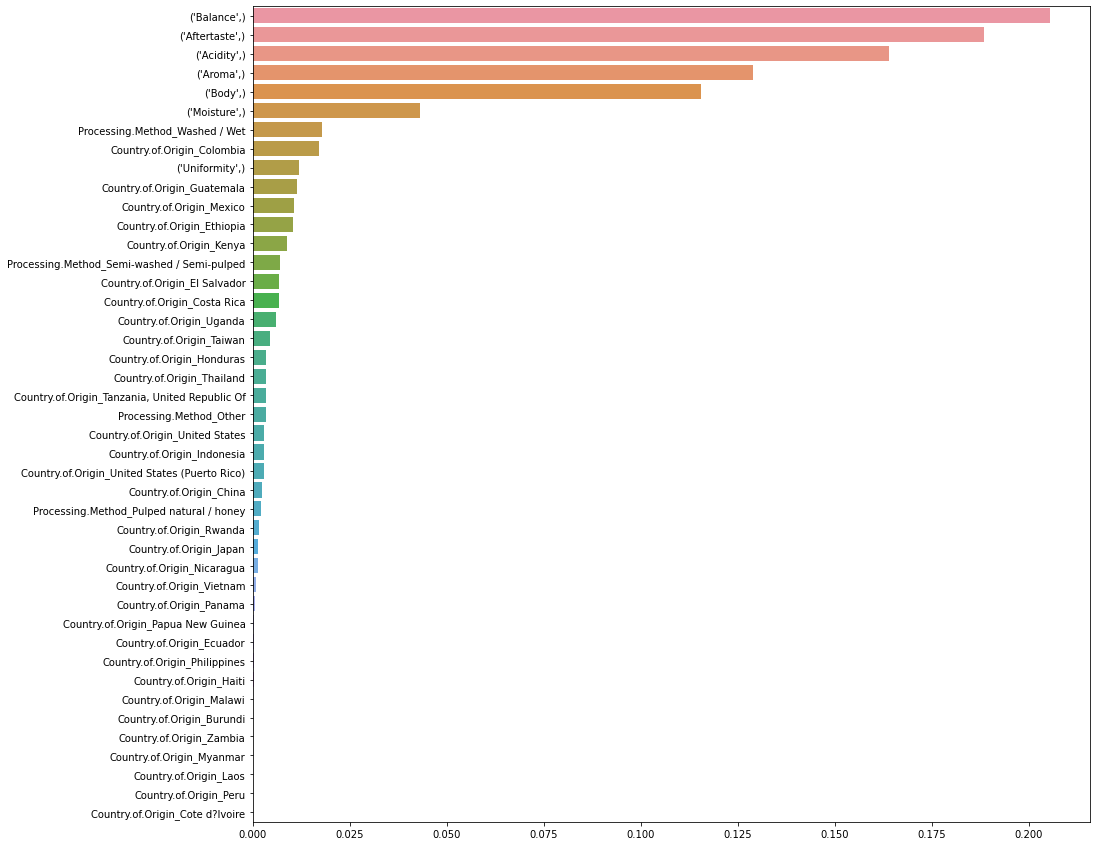

In [369]:
# Creating a bar plot
plt.figure(figsize=(15,15))
sns.barplot(x=temp, y=temp_index)

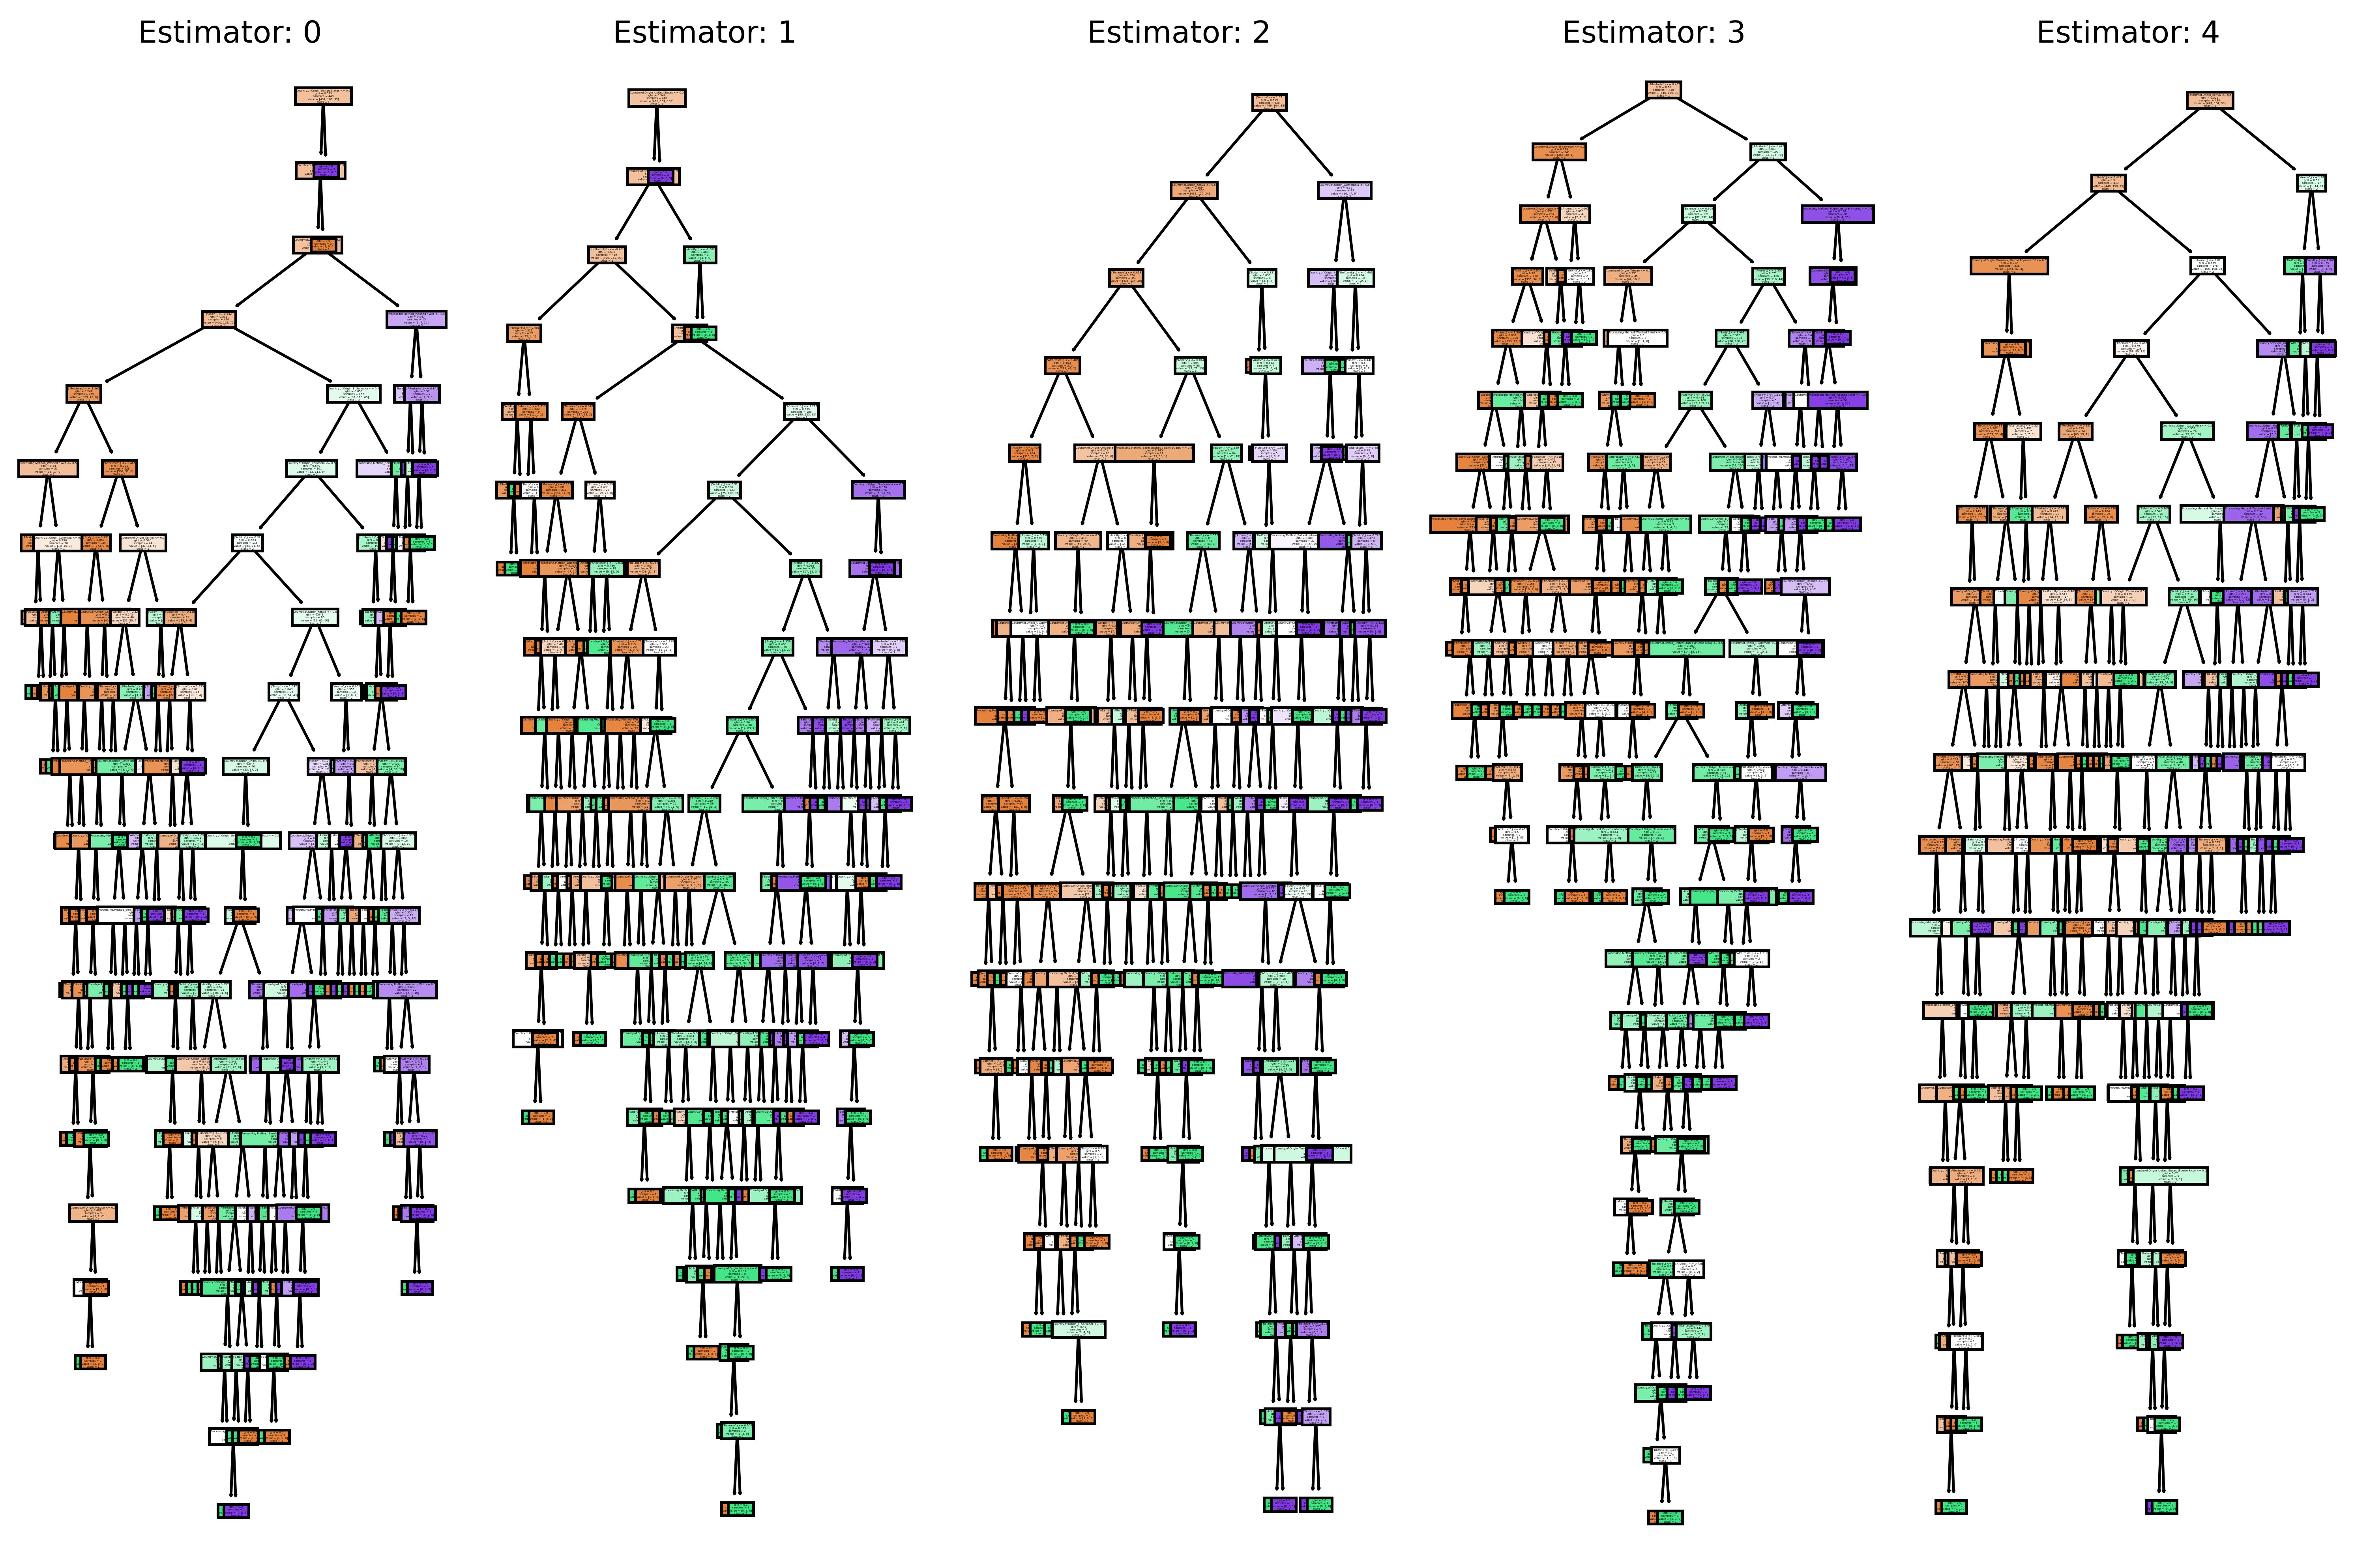

In [371]:
# Visualize selected estimator [0-5] tree structure of Random forest

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (15,10), dpi=500)
for index in range(0, 5):
  sklearn.tree.plot_tree( RandomF.estimators_[index],
                  feature_names = feature_names,
                  class_names= Labels,
                  filled = True,
                  ax = axes[index])

  axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# 7.3 Hyperparameter Tuning (GridsearchCV)

In [372]:
# Create Model List
classification = { 'KNN': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(), 'RF': RandomForestClassifier() }

In [373]:
# Create Parameter Dictionary for KNN
K_list = [1, 3, 5, 7, 9 , 11, 13, 15, 17, 19, 21, 23, 25, 35, 45]
KNN_param = dict(n_neighbors=K_list)

In [374]:
# Create Parameter Dictionary for Decision Tree
ASM_function = ['entropy', 'gini']
maxD = [ 4, 5, 6, None]
maxF = ['auto', 'log2', None]
minSample = [1,2, 4]
DT_param= dict(criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample, max_features = maxF)

In [375]:
# Create Parameter Dictionary for Random Forest (including same parameters as Decision Tree)
nEst = [10, 30, 50, 100]
RF_param = dict(n_estimators = nEst, criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample,
                max_features = maxF)

In [405]:
# Perform GridsearchCV() for each classification model

k = 2
result_est = []
model_name = []
for EST in classification:
  model = classification[EST]
  if (EST == 'KNN'):
    params = KNN_param
  elif(EST == 'DT'):
    params = DT_param
  elif(EST == 'RF'):
    params = RF_param



  grid = GridSearchCV( estimator=model, n_jobs = 2,

          verbose = 10,
          cv = k,
          scoring = 'accuracy',
          param_grid = params )

  grid_result = grid.fit(X_train, Y_train)
  result_est.append(grid_result)
  model_name.append(EST)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



Fitting 2 folds for each of 72 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



Fitting 2 folds for each of 288 candidates, totalling 576 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



In [406]:
grid_result

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, None],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='accuracy', verbose=10)

In [407]:
result_est[0]

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 35, 45]},
             scoring='accuracy', verbose=10)

In [441]:
# Show Best Parameters for both models
param_list = []
score_list = []
for i in range(len(result_est)):
  print('Model : ',model_name[i])
  print('Best params: ',result_est[i].best_params_)
  print('Best score: ', result_est[i].best_score_)
  param_list.append(f'{result_est[i].best_params_} : {model_name[i]}')
  score_list.append(result_est[i].best_score_)
  print('///////////////////////////////////////////////////')
  

Model :  KNN
Best params:  {'n_neighbors': 45}
Best score:  0.7288522588522588
///////////////////////////////////////////////////
Model :  DT
Best params:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4}
Best score:  0.7218722018722019
///////////////////////////////////////////////////
Model :  RF
Best params:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 30}
Best score:  0.7487789987789988
///////////////////////////////////////////////////


In [440]:
# append STD in list

STD_list = []
x_std =[]
y_std = []
for i in range(len(result_est)):
  means = result_est[i].cv_results_['mean_test_score']
  stds = result_est[i].cv_results_['std_test_score']
  params = result_est[i].cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
    if param == {'n_neighbors': 45}:
      STD_list.append([stdev,f'KNN : {param}'])
    elif param == {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4}:
       STD_list.append([stdev,f'DT : {param}'])
    elif param == {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 30}:
      STD_list.append([stdev,f'RF : {param}'])

x_std.append(STD_list[0][0])
x_std.append(STD_list[1][0])
x_std.append(STD_list[2][0])

y_std.append(STD_list[0][1])
y_std.append(STD_list[1][1])
y_std.append(STD_list[2][1])

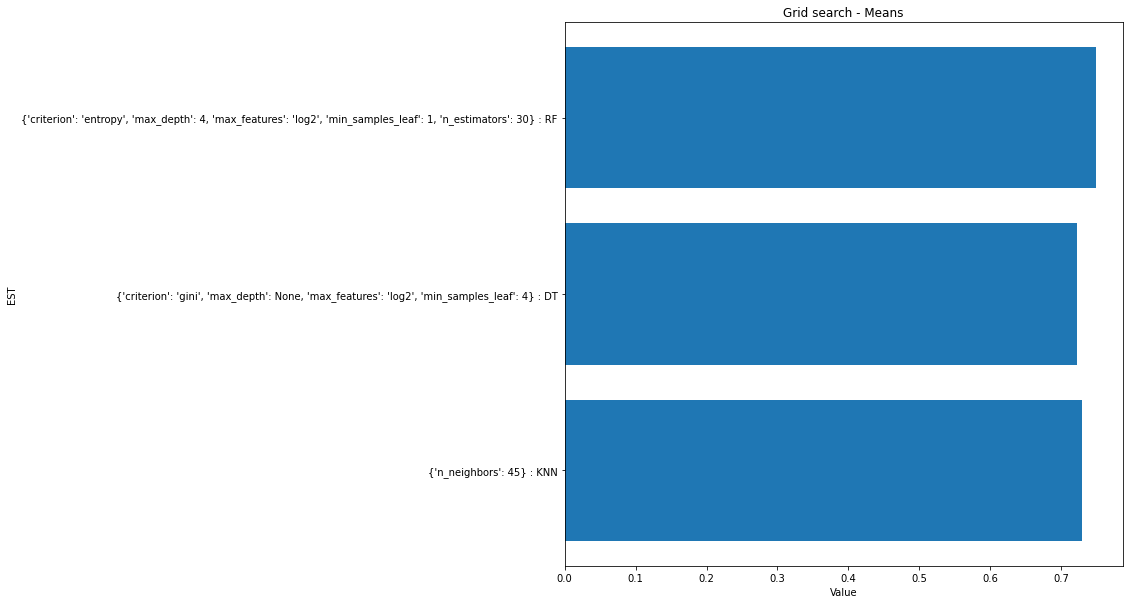

In [442]:
# Show Score for each parameter combination for both model
fig = plt.figure(figsize=(10,10))
plt.barh(param_list, score_list)
#plt.xticks(rotation=90)
plt.title('Grid search - Means') 
plt.ylabel('EST')
plt.xlabel('Value')
plt.show()

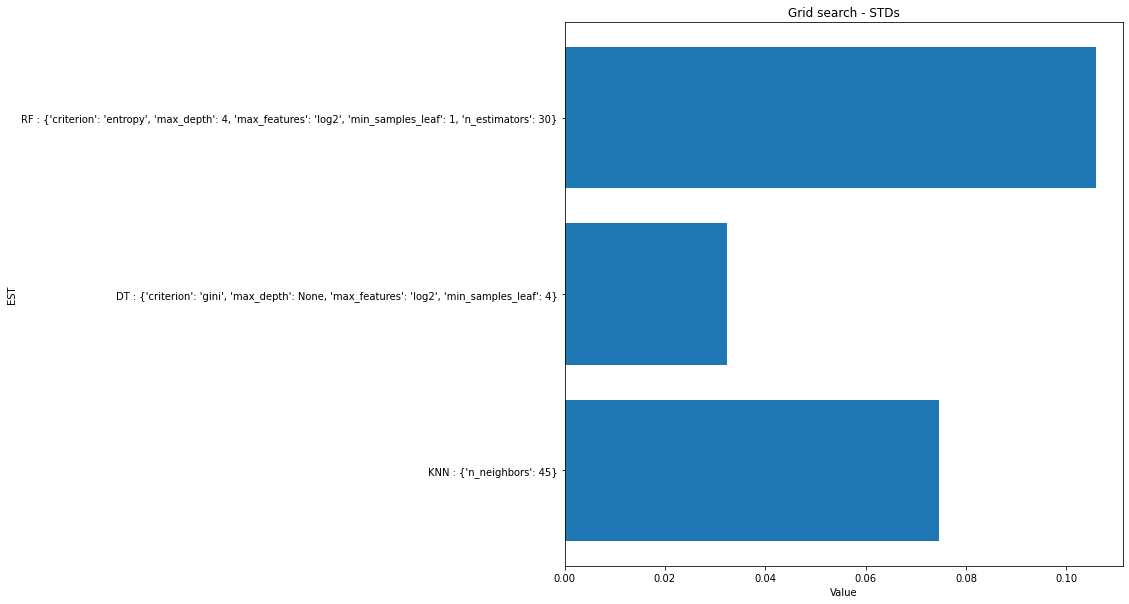

In [443]:
# STD bar plot
fig = plt.figure(figsize=(10,10))
plt.barh(y_std, x_std)
#plt.xticks(rotation=90)
plt.title('Grid search - STDs') 
plt.ylabel('EST')
plt.xlabel('Value')
plt.show()